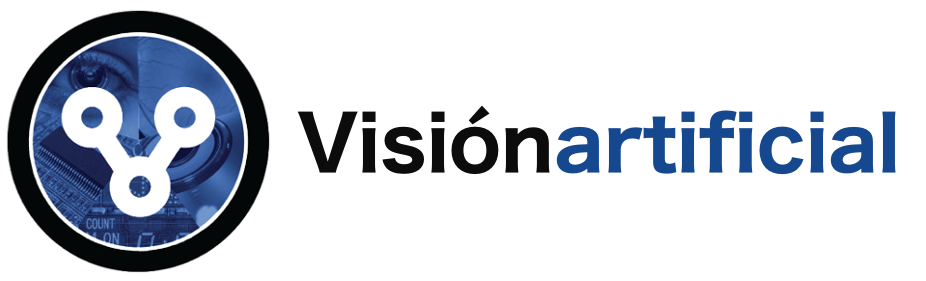

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style = "color:rgb(50,120,229)">Implementación de operaciones Morfolóxicas</font>

No caderno anterior, comentamos como empregar as operacións de dilatación e erosión. Neste, veremos que pasa debaixo do capó das funcións de OpenCV que as implementan. 

O concepto máis importante que cómpre entender é o elemento estruturante. Discutiremos sobre el e como se usa para realizar estas operacións morfolóxicas.

# <font style="color:rgb(50,120,229)">Que é o elemento strutural? </font>

No caderno anterior vimos que se utilizaba un elemento estrutural circular (ou eliptico, en xeral) para realizar operacións de dilatación e erosión. Imos discutir un pouco máis sobre este elemento.

Os elementos estruturantes (tamén coñecidos como kernels) úsanse para modificar a forma dos blobs (rexións binarias brancas sobre fondo negro ou viceversa). Con eles, explóraxe a imaxe e modificamos os píxeles con base nalgunha regra/algoritmo (que gobernará a opereación que se estea a facer: erosión, dilatación, ...)

Hai 3 tipos de elementos estruturantes soportados por OpenCV. 
1. Elíptico/Circular
1. Rectangular
1. Cruz

Para crear os elementos estruturais, OpenCV aporta a función [**`cv2.getStructuringElement`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)

`
element = cv2.getStructuringElement(elementType, kernelSize, anchor)
`
Podes crear outras formas para empregar como elemento estruturante usando un array numpy (binario) colocando 1 nas posicións axeitadas para conseguir a forma desexada.

Vexamos como implementar a operación de dilatación usando un elemento estrutural elíptico cun exemplo. Comentaremos dúas formas de chegar á mesma saída.

## <font style="color:rgb(50,120,229)">Método 1</font>
1. Exploramos a imaxe co kernel seleccionado 
1. cando atopamos un pixel branco que se superpón co centro do kernel, entón realizamos unha operación OR entreo o kernel e a vecindade do pixel.

#### <font style = "color:rgb(200,0,0)">A continuación demos un código que implementa este algoritmo</font>

## <font style="color:rgb(50,120,229)">Método 2</font>
1. Exploramos a imaxe e superpoñemos o kernel coa vecindade de cada píxel. 
1. Realizamos unha operación AND sobre a vecindade do pixel co kernel.
1. Reemplazamos o valor do pixel co valor `maximum` na vecindade dado polo kernel. 

Isto significa que comproba cada píxel e a vecindade con respecto ao núcleo e cambia o píxel a branco se algún dos píxeles deste entorno é branco. OpenCV implementa unha versión optimizada deste método. Isto funcionará aínda que a imaxe non sexa binaria.

#### <font style = "color:rgb(200,0,0)">Implementa este método, tanto para a dilatación como para a erosión, nuhha tarefa. Proporcionaremos consellos.</font>

## <font style="color:rgb(50,120,229)">Importamos as librarias </font>

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Creamos unha imaxe Demo</font>
## <font style="color:rgb(50,120,229)">Creamos unha matriz baleira</font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


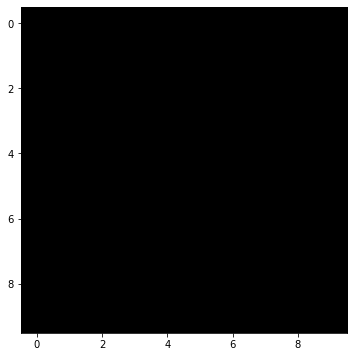

In [15]:
im = np.zeros((10,10),dtype='uint8')
print(im);
plt.imshow(im)

## <font style="color:rgb(50,120,229)">Engadimos algúns blobs brancos</font>

Engadimos blobs en diferentes lugares para cubrir casos límites.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


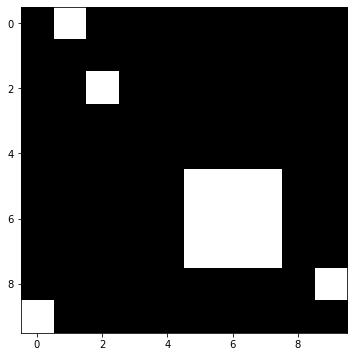

In [16]:
im[0,1] = 1
im[-1,0]= 1
im[-2,-1]=1
im[2,2] = 1
im[5:8,5:8] = 1

print(im)
plt.imshow(im)

Esta imaxe converterase será a que empregaremos con fins ilustrativos

## <font style="color:rgb(50,120,229)">Creamos un elemento estrutural elíptico </font>
Crearemos o elemento estrutural eléptico de 3x3.

In [17]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [18]:
ksize = element.shape[0]

In [19]:
height,width = im.shape[:2]

## <font style="color:rgb(50,120,229)">Dilatación a partir de scratch : Método 1</font>

Pixel branco atopado @ 1,2
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


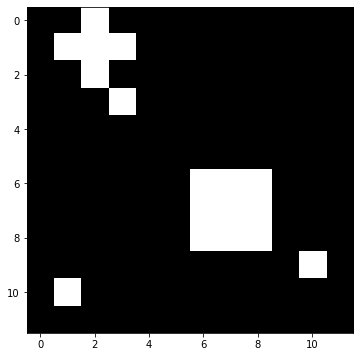

Pixel branco atopado @ 3,3
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


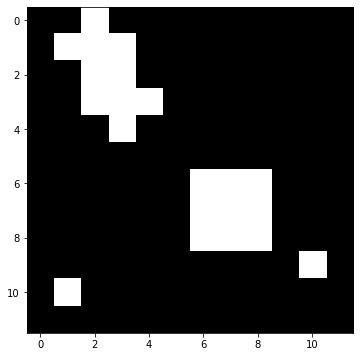

Pixel branco atopado @ 6,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


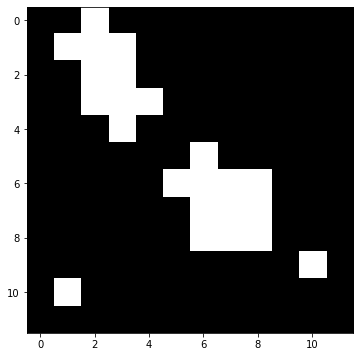

Pixel branco atopado @ 6,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


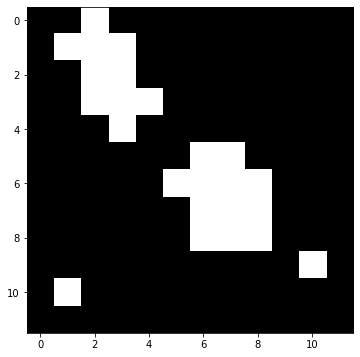

Pixel branco atopado @ 6,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


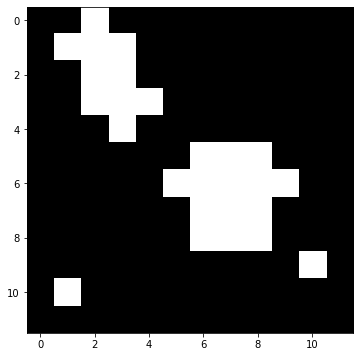

Pixel branco atopado @ 7,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


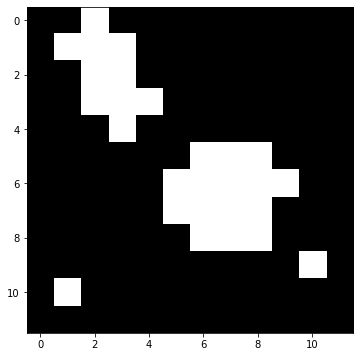

Pixel branco atopado @ 7,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


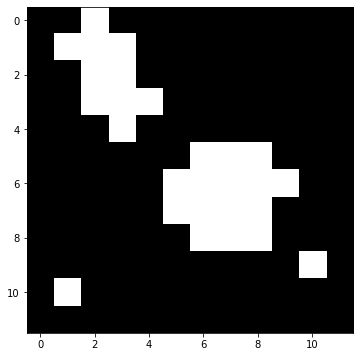

Pixel branco atopado @ 7,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


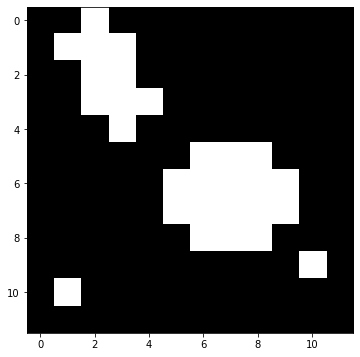

Pixel branco atopado @ 8,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


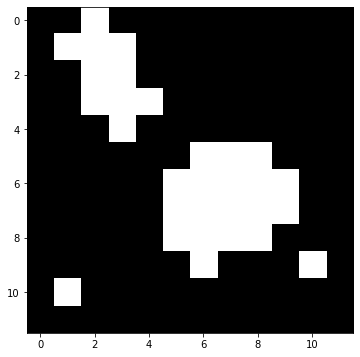

Pixel branco atopado @ 8,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


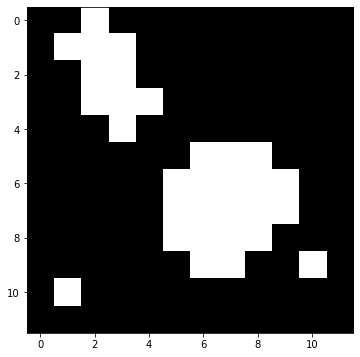

Pixel branco atopado @ 8,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


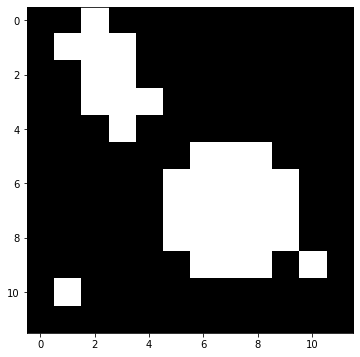

Pixel branco atopado @ 9,10
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


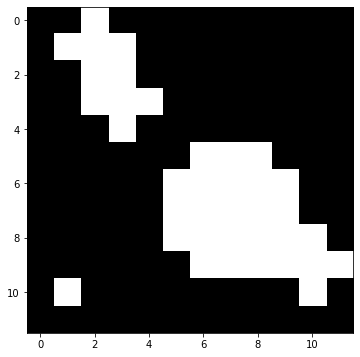

Pixel branco atopado @ 10,1
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]


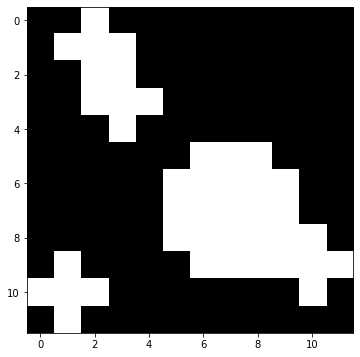

In [20]:
border = ksize//2
# Creamos unha imaxe ampliada (padded) con ceros
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        # Cando atopamos un pixel branco
        if im[h_i-border,w_i-border]:
            print("Pixel branco atopado @ {},{}".format(h_i,w_i))
            
            paddedIm[ h_i - border : (h_i + border)+1, w_i - border : (w_i + border)+1] = \
                cv2.bitwise_or(paddedIm[ h_i - border : (h_i + border)+1, w_i - border : (w_i + border)+1],element)
            
            # Imprimimos o resultado intermedio
            print(paddedIm)
            plt.imshow(paddedIm);plt.show()


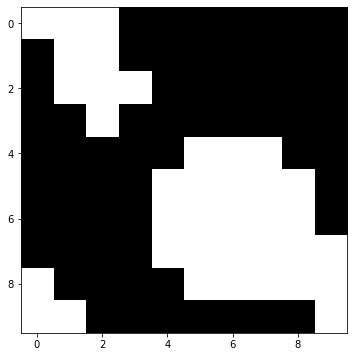

In [21]:
# Crop out the original dimension from the padded output image
dilatedImage = paddedIm[border:border+height,border:border+width]
plt.imshow(dilatedImage)

### <font style = "color:rgb(8,133,37)">Sintaxe da función</font>

```python
dst = cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value)
```

**`dst`**	imaxe de saída do mesmo tamaño e o mesmo número de canles que src.

A función ten  **3 argumento de entrada requiridos**:

1. **`src`**	imaxe de entrada.
2. **`top`**	É o ancho do borde en píxeles na parte superior.
3. **`bottom`**	É o ancho do borde en píxeles na parte inferior.
4. **`left`**	É o ancho do borde en píxeles na parte esquerda.
5. **`right`**	É o ancho do borde en píxeles na parte dereito.
6. **`borderType`**	especifica que tipo de borde será engadido. Defínise cos seguintes flagscv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc 
7. **`dest`**: Imaxe destino

argumento opcionais:

8. **`value`**: Parámetro opcional que especifica a cor do borde se é de valor constante cv2.BORDER_CONSTANT.


### <font style="color:rgb(8,133,37)">Documentación OpenCV</font>

[**`copyMakeBorder()`**](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36)


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## <font style="color:rgb(50,120,229)">Comparamos coa función cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


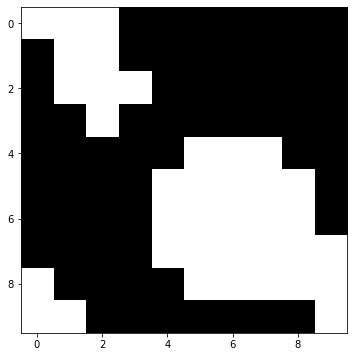

In [22]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)